In [242]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

In [243]:
reddit_file_1 = 'AskCulinary.csv'
reddit_file_2 = 'running.csv'

In [244]:
posts_1 = pd.read_csv(f'./data/{reddit_file_1}')
posts_2 = pd.read_csv(f'./data/{reddit_file_2}')

Concat second reddit posts dataframe to the first so we have one large dataframe containing two subreddit categories.

In [245]:
reddit_posts = pd.concat([posts_1, posts_2])


In [246]:
reddit_posts.shape

(2200, 6)

In [247]:
reddit_posts.tail()

,subreddit,selftext,title,author,created_utc,created_date
1095,running,[removed],Running teammate rivalry,Fastboy56138,1608251056,2020-12-18 00:24:16
1096,running,[removed],Real question: How do you run longer distances...,KeepPunkRockElite,1608250647,2020-12-18 00:17:27
1097,running,[removed],Anyone Else Get Wildly Different Results Using...,Accomplished-Classic,1608250104,2020-12-18 00:08:24
1098,running,[removed],Got back at running after 5 months 💪if u had a...,paul081,1608249362,2020-12-17 23:56:02
1099,running,[removed],Another little magical running moment: share y...,SnooConfections3930,1608249077,2020-12-17 23:51:17


In [248]:
reddit_posts.isnull().sum()

subreddit        0
selftext        19
title            0
author           0
created_utc      0
created_date     0
dtype: int64

In [249]:
reddit_posts.dropna(inplace=True)
reddit_posts.reset_index(drop=True, inplace=True)

Delete all posts that have been removed. (The selftext field contains \[removed\])

In [250]:
#reddit_posts.sort_values(by='selftext')
indices_to_remove = reddit_posts[reddit_posts['selftext'].str.contains('\[removed\]')].index

reddit_posts.drop(indices_to_remove, inplace=True)
reddit_posts.reset_index(drop=True, inplace=True)

Delete all posts that have been deleted. (The selftext field contains \[deleted\])

In [251]:
#reddit_posts.sort_values(by='selftext')
deleted_to_remove = reddit_posts[reddit_posts['selftext'].str.contains('\[deleted\]')].index

reddit_posts.drop(deleted_to_remove, inplace=True)
reddit_posts.reset_index(drop=True, inplace=True)

In [252]:
reddit_posts[reddit_posts['selftext'].str.len() < 20]

,subreddit,selftext,title,author,created_utc,created_date
52,AskCulinary,Please help lol,I just used wax paper instead of parchment pap...,NativeKyd1994,1609218277,2020-12-29 05:04:37
67,AskCulinary,Am I doomed?,Forgot to grease glass pan for brownies. Bakin...,CoughCoolCoolCool,1609210981,2020-12-29 03:03:01
449,AskCulinary,im excited :-),bought myself a stainless steel fry pan for th...,itsbad2004,1608790923,2020-12-24 06:22:03
548,AskCulinary,Thank you!,Anyone please help me identify the small gold ...,tyravaldez,1608731699,2020-12-23 13:54:59
701,AskCulinary,plz help me,Paprika-First or last,itzzbraydon123,1608592199,2020-12-21 23:09:59
788,AskCulinary,help,what’s the purpose behind scoring salmon befor...,yabkushshs,1608506590,2020-12-20 23:23:10
861,AskCulinary,Please,What are some good ideas on using plane unflav...,nameyouafkexe,1608418728,2020-12-19 22:58:48
958,AskCulinary,Why?,Why is banana not called penis fruit?,Rustnr0t,1608285597,2020-12-18 09:59:57
964,AskCulinary,Just curious,Why does bechamel continue to thicken as it co...,JosephGreg,1608273135,2020-12-18 06:32:15
1115,running,It feels like cum,"Why's the saliva formed ,while running, so thick",Ignoca,1609218147,2020-12-29 05:02:27


Data cleaning:
 * Remove newline characters
 * Remove url's that might appear

In [253]:
reddit_posts['selftext'].replace('\n', ' ', regex=True, inplace=True)

# Regex example here:
#https://github.com/hundredblocks/concrete_NLP_tutorial/blob/master/NLP_notebook.ipynb
# \S captures all non-white space, + means greedy so goes until the end of a word.
reddit_posts['selftext'].replace('http\S+', ' ', regex=True, inplace=True)

# delete stray &amp; words
reddit_posts['selftext'].replace('&amp;', ' ', regex=True, inplace=True)

# delete #x200B; which is zero width space
reddit_posts['selftext'].replace('#x200B;', ' ', regex=True, inplace=True)

# delete measurements in a recipe. eg. 5.3oz, 1 1/4 cups
# This deletes all numbers, which may or may not include a period or a /, then have a letter or series of letters on the end
# as in 57g
reddit_posts['selftext'].replace('(\d+)[.|\/]?(\d+)?(\w+)?', ' ', regex=True, inplace=True)

# delete underscores, backslashes and forward slashes
reddit_posts['selftext'].replace('_|\\|\/', ' ', regex=True, inplace=True)

# to avoid getting a ton of 've' words after vectorizing, replace I've with I have
reddit_posts['selftext'].replace('[i|I][\’|\']ve', 'I have', regex=True, inplace=True)

# replace don't with do not
reddit_posts['selftext'].replace('[d|D]on[\’|\']t', 'do not', regex=True, inplace=True)

# replace aren't with are not
reddit_posts['selftext'].replace('[a|A]ren[\’|\']t', 'are not', regex=True, inplace=True)

# replace doesn't with does not
reddit_posts['selftext'].replace('[d|D]oesn[\’|\']t', 'does not', regex=True, inplace=True)


In [254]:
#Delete posts with less than 20 characters in their self text - they are normally garbage data or not worth keeping
short_text_posts = reddit_posts[(reddit_posts['selftext'].str.len() < 20)].index

reddit_posts.drop(short_text_posts, inplace=True)
reddit_posts.reset_index(drop=True, inplace=True)

In [255]:
reddit_posts.iloc[1504]['selftext']

"Hi all! I started running this year and have happily been able to slowly jog   a few times a week for the last couple of weeks!  However, I have started finding that on the day after a run, I'll get incredibly painful shooting pains in my right hip and upper thigh. Its not constant, but when it hits it really hurts.  Does anyone have any guidance on what might be causing this? Gait? I'm overweight so I imagine that does not help.  I just want to get running again, and do not want to lose the progress I have made, but I obviously need to rest at the moment."

Check for duplicates.  Not sure why but sometimes people submit the same post more than once. Perhaps they don't think it went through the first time?

In [256]:
reddit_posts.shape

(1939, 6)

In [257]:
reddit_posts['selftext'].nunique()

1902

So there are 1902 unique selftext values, but 1939 rows, so there are duplicates.

In [258]:
reddit_posts.drop_duplicates(subset=['selftext'], inplace=True, ignore_index=True)
reddit_posts.shape

(1902, 6)

Create class column:
 * Subreddit 1 - AskCulinary
 * Subreddit 0 - running

In [259]:
reddit_posts['class'] = [1 if cat=='AskCulinary' else 0 for cat in reddit_posts['subreddit']]

In [260]:
reddit_posts.tail()

,subreddit,selftext,title,author,created_utc,created_date,class
1897,running,"I’m ’ and lbs. I’m not obese by any means,...",Help getting in shape for Army enlistment?,ProConstitution,1608278170,2020-12-18 07:56:10,0
1898,running,When I was a child I would have nightmares abo...,Nightmare,MRHBK,1608274467,2020-12-18 06:54:27,0
1899,running,I wanted to share appreciation for resilience ...,New Strava feature? 2020 Year In Sport report,goodneed,1608274073,2020-12-18 06:47:53,0
1900,running,As a year old female whose average time ha...,Is it possible to shave 3min off 5k time in le...,chickthatclicks,1608259645,2020-12-18 02:47:25,0
1901,running,"Hi guys, I currently run days a week for a t...",Best speed workout to improve 1.5 mile time?,ILikeToHikeAndStuff,1608251620,2020-12-18 00:33:40,0


In [261]:
# add stop words that might be measurements for recipes, and distance for running (km)
# hat tip to for adding custom stop words : https://stackoverflow.com/a/24386751/732396

# the most common words in the running subreddit were, not surprisingly, run and running, so let's take
# those out
more_stop_words = ['oz', 'cups', 'km', 'run', 'running']
stop_words = text.ENGLISH_STOP_WORDS.union(more_stop_words)

Inspect the data using Count Vectorizer.  This will also be done in the modeling step

In [262]:
count_vec = CountVectorizer(stop_words = stop_words)
count_vec.fit(reddit_posts['selftext'])

CountVectorizer(stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}))

In [263]:
transformed_df = count_vec.transform(reddit_posts['selftext'])

In [264]:
transformed_df.shape

(1902, 9841)

In [265]:
#count_vec.get_feature_names()[0:100]

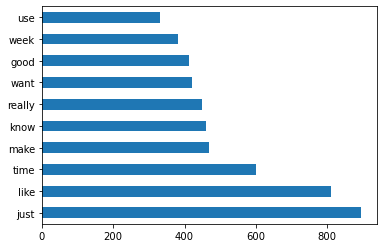

In [266]:
# Code borrowed from lesson 5.04
# convert training data to dataframe
words_df = pd.DataFrame(transformed_df.todense(), 
                          columns=count_vec.get_feature_names())

# plot top occuring words
words_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');

Based on above, we should add 'like' and 'just' to the list of stop words, since they don't add much value.

Export clean data

In [267]:
reddit_posts.to_csv('data/clean_posts.csv', index=False)